<a href="https://colab.research.google.com/github/Sompote/cov_gradation/blob/main/gradation_pso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install xlwt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 4.6 MB/s eta 0:00:00


In [20]:
#------------------------------------------------------------------------------+
#
#	Nathan A. Rooy
#	Simple Particle Swarm Optimization (PSO) with Python
#	Last update: 2018-JAN-26
#	Python 3.6
#
#------------------------------------------------------------------------------+

#--- IMPORT DEPENDENCIES ------------------------------------------------------+

from random import random
from random import uniform

#--- MAIN ---------------------------------------------------------------------+

class Particle:
    def __init__(self, x0):
        self.position_i=[]          # particle position
        self.velocity_i=[]          # particle velocity
        self.pos_best_i=[]          # best position individual
        self.err_best_i=-1          # best error individual
        self.err_i=-1               # error individual

        for i in range(0,num_dimensions):
            self.velocity_i.append(uniform(-1,1))
            self.position_i.append(x0[i])

    # evaluate current fitness
    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i)

        # check to see if the current position is an individual best
        if self.err_i<self.err_best_i or self.err_best_i==-1:
            self.pos_best_i=self.position_i.copy()
            self.err_best_i=self.err_i
                    
    # update new particle velocity
    def update_velocity(self,pos_best_g):
        w=0.5       # constant inertia weight (how much to weigh the previous velocity)
        c1=1        # cognative constant
        c2=2        # social constant
        
        for i in range(0,num_dimensions):
            r1=random()
            r2=random()
            
            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    # update the particle position based off new velocity updates
    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]
            
            # adjust maximum position if necessary
            if self.position_i[i]>bounds[i][1]:
                self.position_i[i]=bounds[i][1]

            # adjust minimum position if neseccary
            if self.position_i[i]<bounds[i][0]:
                self.position_i[i]=bounds[i][0]
        
        
def minimize(costFunc, x0, bounds, num_particles, maxiter, verbose=False):
    global num_dimensions

    num_dimensions=len(x0)
    err_best_g=-1                   # best error for group
    pos_best_g=[]                   # best position for group

    # establish the swarm
    swarm=[]
    for i in range(0,num_particles):
        swarm.append(Particle(x0))

    # begin optimization loop
    i=0
    while i<maxiter:
        if verbose: print(f'iter: {i:>4d}, best solution: {err_best_g:10.6f}, parameter{pos_best_g}')
            
        # cycle through particles in swarm and evaluate fitness
        for j in range(0,num_particles):
            swarm[j].evaluate(costFunc)

            # determine if current particle is the best (globally)
            if swarm[j].err_i<err_best_g or err_best_g==-1:
                pos_best_g=list(swarm[j].position_i)
                err_best_g=float(swarm[j].err_i)
        
        # cycle through swarm and update velocities and position
        for j in range(0,num_particles):
            swarm[j].update_velocity(pos_best_g)
            swarm[j].update_position(bounds)
        i+=1

    # print final results
    if verbose:
        print('\nFINAL SOLUTION:')
        print(f'   > {pos_best_g}')
        print(f'   > {err_best_g}\n')

    return err_best_g, pos_best_g



/content/drive/MyDrive/gradation/picture/low_fine/16.jpeg
/content/drive/MyDrive/gradation/picture/low_fine/17.jpeg
/content/drive/MyDrive/gradation/picture/low_fine/19.jpeg
/content/drive/MyDrive/gradation/picture/low_fine/20.jpeg
/content/drive/MyDrive/gradation/picture/low_fine/23.jpeg
/content/drive/MyDrive/gradation/picture/low_fine/24.jpeg
/content/drive/MyDrive/gradation/picture/low_fine/25.jpeg
/content/drive/MyDrive/gradation/picture/low_fine/26.jpeg
/content/drive/MyDrive/gradation/picture/low_fine/30.jpeg
/content/drive/MyDrive/gradation/picture/low_fine/31.jpeg
/content/drive/MyDrive/gradation/picture/low_fine/34.jpeg
/content/drive/MyDrive/gradation/picture/low_fine/35.jpeg
/content/drive/MyDrive/gradation/picture/low_fine/36.jpeg
/content/drive/MyDrive/gradation/picture/low_fine/38.jpeg
/content/drive/MyDrive/gradation/picture/low_fine/39.jpeg
/content/drive/MyDrive/gradation/picture/low_fine/40.jpeg
/content/drive/MyDrive/gradation/picture/low_fine/43.jpeg
/content/drive

<ipython-input-9-40f92ecb8605>:168: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df.to_excel('/content/drive/MyDrive/gradation/picture/low_fine/grain_size.xls', index=False)


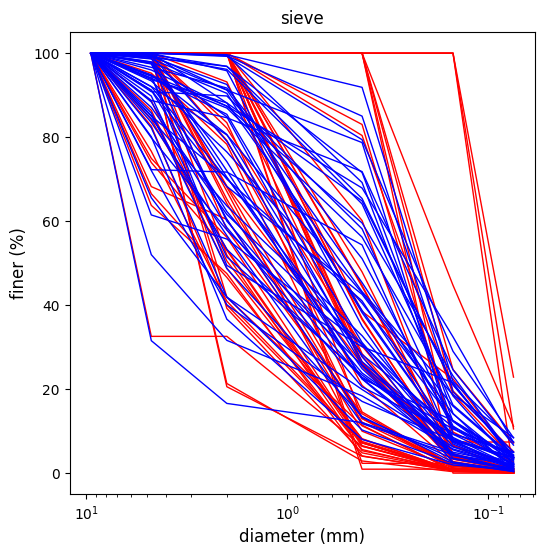

In [9]:
import sys
import cv2
#from object_detector import *
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os, re, glob
import cv2
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF
from google.colab.patches import cv2_imshow

def decimal_to_odd(decimal):
  # Convert the decimal to an integer by rounding it
  integer = round(decimal)
  # If the integer is even, add or subtract one to make it odd
  if integer % 2 == 0:
    # Choose randomly between adding or subtracting one
    import random
    choice = random.choice([-1, 1])
    integer += choice
  # Return the odd integer
  return integer

class HomogeneousBgDetector():
    def __init__(self,range, c):
      self.range=decimal_to_odd(range)
      self.c=int(c)
      pass

    def detect_objects(self, frame,mask_area):
        # Convert Image to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # Create a Mask with adaptive threshold
        mask = cv2.GaussianBlur(gray, (5, 5), 10)
        mask = cv2.adaptiveThreshold(mask, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, self.range, self.c)

        mask = cv2.rectangle(mask, mask_area[0, 0, 0] + [100, +100], mask_area[0, 0, 2] - [100, +100],
                             (0, 0, 0), -1)  # remove aruco from detect

        # Find contours
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        #cv2.imshow("mask", mask)
        objects_contours = []

        for cnt in contours:
            area = cv2.contourArea(cnt)
            if area > 5:
                cnt = cv2.approxPolyDP(cnt, 0.03*cv2.arcLength(cnt, True), True)
            objects_contours.append(cnt)

        return contours

def sieve_number(xdata): # sieve curve my weight
    xdata_n=np.array( [9.5,4.75,2,0.425,0.15,0.075])
    particle_limit =9.5
    indices = np.argwhere(xdata>= particle_limit)
    xdata = np.delete(xdata, indices)
    ydata_sieve = np.array([])
    sum_wt=np.sum((xdata**2))
    for dia in  xdata_n:
        sum_dia=0
        for data in xdata:
            if data < dia:
                sum_dia=data**2+sum_dia
        ydata_sieve=np.append(ydata_sieve,sum_dia/sum_wt)
    return xdata_n, ydata_sieve

def detect_grain(img,size_aruco):
    grain_size_dist = np.array([])
    # Get Aruco marker
    corners, _, _ = cv2.aruco.detectMarkers(img, dictionary, parameters=parameters)

    # Draw polygon around the marker
    int_corners = np.int0(corners)
    # cv2.polylines(img, int_corners, True, (0, 255, 0), 5)
    # Aruco Perimeter
    #print(int_corners[0, 0, 0])
    f_corner = np.array(corners)
    corner_per = f_corner[0, 0, :, :]

    # img=image_perspective(img,corner_per)
    # img= crop_image(img)

    # redetect aruco
    corners, _, _ = cv2.aruco.detectMarkers(img, dictionary, parameters=parameters)
    int_corners = np.int0(corners)
    f_corner = np.array(corners)

    corner_per = f_corner[0, 0, :, :]
    aruco_perimeter = cv2.arcLength(corners[0], True)

    # Pixel to cm ratio
    pixel_cm_ratio = aruco_perimeter / size_aruco  # size of tha marker
    contours = detector.detect_objects(img, int_corners)

    # Draw objects boundaries
    for cnt in contours:
        # Get rect
        rect = cv2.minAreaRect(cnt)
        #x, y, w, h = rect
        (x, y), (w, h), angle = rect

        # Get Width and Height of the Objects by applying the Ratio pixel to cm
        object_width = w / pixel_cm_ratio
        object_height = h / pixel_cm_ratio

        object_size=(object_width+object_height)/(2)
        grain_size_dist = np.append(grain_size_dist, object_size)
      

        # Display rectangle

        box = cv2.boxPoints(rect)
        box = np.int0(box)
        cv2.polylines(img, [box], True, (255, 0, 0), 2)
        
    df = pd.DataFrame(grain_size_dist, columns=["grain_size"])
    sample = df['grain_size'].to_numpy()
    # x,y =ecdf(sample)
    x, y = sieve_number(sample)
    y = y * 100
    #print(x, y)
    #plot_graph(x, y)

    return x,y

#main program


# Load Aruco detector

dictionary = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_5X5_50)
parameters =  cv2.aruco.DetectorParameters()
detector = cv2.aruco.ArucoDetector(dictionary, parameters)



# Load Object Detector
#detector = HomogeneousBgDetector(301,72)
detector = HomogeneousBgDetector(964,95)

# Load Image


path = '/content/drive/MyDrive/gradation/picture/low_fine'
files = glob.glob(os.path.join(path, '*.jpeg'))
files.sort(key=lambda x:[int(c) if c.isdigit() else c for c in re.split(r'(\d+)', x)]) #sort file name

sum_grade=np.array([[9.5,4.75,2,0.425,0.15,0.075]])
sum_grade=np.reshape(sum_grade,(1,6))
for file in files:
    # Read the image
    img = cv2.imread(file)
    x, y = detect_grain(img, 80) #can change ARUCO size)
    y=np.reshape(y,(1,6))
    sum_grade = np.append(sum_grade, y, axis=0)
    print(file)
  #  sum_grade = np.append(sum_grade,y,  axis=1)
    #sum_grade=np.stack((sum_grade,y),axis=1)
    #print(sum_grade)

df = pd.DataFrame(np.transpose(sum_grade))
df = df.rename(columns={0: 'finer'})
df.to_excel('/content/drive/MyDrive/gradation/picture/low_fine/grain_size.xls', index=False)
print(df)
print(sum_grade)

#read test data

df_test = pd.read_excel('/content/drive/MyDrive/gradation/picture/low_fine/select_low_fine.xlsx')
test=np.transpose(np.array(df_test))
print(test)
print(sum_grade)
mape= np.mean(np.absolute((test - sum_grade) / test)) * 100
mape2= np.mean(np.absolute(test[:,0:2] - sum_grade[:,0:2]) / test[:,0:2]) * 100
mape3= np.mean(np.absolute(test[:,3:5] - sum_grade[:,3:5]) / test[:,3:5]) * 100
mape4= np.mean(np.absolute(test[:,3] - sum_grade[:,3]) / test[:,3]) * 100

print('**MAPE**',mape,' percent')
print('**MAPE course grain**',mape2,' percent')
print('**MAPE fine grain**',mape3,' percent')
print('**MAPE 0.4 grain**',mape4,' percent')
#determine mean square error

#plotdata
plt.figure(figsize=(6,6))
plt.title('sieve')
plt.plot(df.iloc[:,0],df.iloc[:,1:],linewidth=1, color='red')
plt.plot(df.iloc[:,0],df_test.iloc[:,1:],linewidth=1, color='blue')
plt.xlabel('diameter (mm)', fontsize=12)
plt.ylabel('finer (%)', fontsize=12)
plt.xscale('log')
plt.gca().invert_xaxis()
plt.show()




In [23]:
import sys
import cv2
#from object_detector import *
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os, re, glob
import cv2
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF
from google.colab.patches import cv2_imshow

def decimal_to_odd(decimal):
  # Convert the decimal to an integer by rounding it
  integer = round(decimal)
  # If the integer is even, add or subtract one to make it odd
  if integer % 2 == 0:
    # Choose randomly between adding or subtracting one
    import random
    choice = random.choice([-1, 1])
    integer += choice
  # Return the odd integer
  if integer <2 : integer =3
  return integer

class HomogeneousBgDetector():
    def __init__(self,range, c):
      self.range=decimal_to_odd(range)
      self.c=int(c)
      pass

    def detect_objects(self, frame,mask_area):
        # Convert Image to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # Create a Mask with adaptive threshold
        mask = cv2.GaussianBlur(gray, (5, 5), 10)
        mask = cv2.adaptiveThreshold(mask, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, self.range, self.c)

        mask = cv2.rectangle(mask, mask_area[0, 0, 0] + [100, +100], mask_area[0, 0, 2] - [100, +100],
                             (0, 0, 0), -1)  # remove aruco from detect

        # Find contours
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        #cv2.imshow("mask", mask)
        objects_contours = []

        for cnt in contours:
            area = cv2.contourArea(cnt)
            if area > 5:
                cnt = cv2.approxPolyDP(cnt, 0.03*cv2.arcLength(cnt, True), True)
            objects_contours.append(cnt)

        return contours

def sieve_number(xdata): # sieve curve my weight
    xdata_n=np.array( [9.5,4.75,2,0.425,0.15,0.075])
    particle_limit =9.5
    indices = np.argwhere(xdata>= particle_limit)
    xdata = np.delete(xdata, indices)
    ydata_sieve = np.array([])
    sum_wt=np.sum((xdata**2))
    for dia in  xdata_n:
        sum_dia=0
        for data in xdata:
            if data < dia:
                sum_dia=data**2+sum_dia
        ydata_sieve=np.append(ydata_sieve,sum_dia/sum_wt)
    return xdata_n, ydata_sieve

def detect_grain(img,size_aruco):
    grain_size_dist = np.array([])
    # Get Aruco marker
    corners, _, _ = cv2.aruco.detectMarkers(img, dictionary, parameters=parameters)

    # Draw polygon around the marker
    int_corners = np.int0(corners)
    # cv2.polylines(img, int_corners, True, (0, 255, 0), 5)
    # Aruco Perimeter
    #print(int_corners[0, 0, 0])
    f_corner = np.array(corners)
    corner_per = f_corner[0, 0, :, :]

    # img=image_perspective(img,corner_per)
    # img= crop_image(img)

    # redetect aruco
    corners, _, _ = cv2.aruco.detectMarkers(img, dictionary, parameters=parameters)
    int_corners = np.int0(corners)
    f_corner = np.array(corners)

    corner_per = f_corner[0, 0, :, :]
    aruco_perimeter = cv2.arcLength(corners[0], True)

    # Pixel to cm ratio
    pixel_cm_ratio = aruco_perimeter / size_aruco  # size of tha marker
    contours = detector.detect_objects(img, int_corners)

    # Draw objects boundaries
    for cnt in contours:
        # Get rect
        rect = cv2.minAreaRect(cnt)
        #x, y, w, h = rect
        (x, y), (w, h), angle = rect

        # Get Width and Height of the Objects by applying the Ratio pixel to cm
        object_width = w / pixel_cm_ratio
        object_height = h / pixel_cm_ratio

        object_size=(object_width+object_height)/(2)
        grain_size_dist = np.append(grain_size_dist, object_size)
      

        # Display rectangle

        box = cv2.boxPoints(rect)
        box = np.int0(box)
        cv2.polylines(img, [box], True, (255, 0, 0), 2)
        
    df = pd.DataFrame(grain_size_dist, columns=["grain_size"])
    sample = df['grain_size'].to_numpy()
    # x,y =ecdf(sample)
    x, y = sieve_number(sample)
    y = y * 100
    #print(x, y)
    #plot_graph(x, y)

    return x,y


def fc(x):
    #main program


  # Load Aruco detector
  global dictionary
  global parameters
  global detector
  dictionary = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_5X5_50)
  parameters =  cv2.aruco.DetectorParameters()
  detector = cv2.aruco.ArucoDetector(dictionary, parameters)



  # Load Object Detector
  detector = HomogeneousBgDetector(x[0],x[1])
  # Load Imagex


  path = '/content/drive/MyDrive/gradation/picture/2mix'
  files = glob.glob(os.path.join(path, '*.jpeg'))
  files.sort(key=lambda x:[int(c) if c.isdigit() else c for c in re.split(r'(\d+)', x)]) #sort file name

  sum_grade=np.array([[9.5,4.75,2,0.425,0.15,0.075]])
  sum_grade=np.reshape(sum_grade,(1,6))
  for file in files:
      # Read the image
      img = cv2.imread(file)
      x, y = detect_grain(img, 80) #can change ARUCO size)
      y=np.reshape(y,(1,6))
      sum_grade = np.append(sum_grade, y, axis=0)
     
    #  sum_grade = np.append(sum_grade,y,  axis=1)
      #sum_grade=np.stack((sum_grade,y),axis=1)
      #print(sum_grade)

  df = pd.DataFrame(np.transpose(sum_grade))
  df = df.rename(columns={0: 'finer'})
  #df.to_excel('/content/drive/MyDrive/gradation/picture/2mix/test.xlsx', index=False)


  #read test data

  df_test = pd.read_excel('/content/drive/MyDrive/gradation/picture/2mix/test.xlsx')
  test=np.transpose(np.array(df_test))
  #print(test)
  #print(sum_grade)
  mape= np.mean(np.absolute((test - sum_grade) / test)) * 100
  mape2= np.mean(np.absolute(test[:,0:2] - sum_grade[:,0:2]) / test[:,0:2]) * 100
  mape3= np.mean(np.absolute(test[:,3:5] - sum_grade[:,3:5]) / test[:,3:5]) * 100
  mape4= np.mean(np.absolute(test[:,3] - sum_grade[:,3]) / test[:,3]) * 100
  f=mape
  return f

 

In [24]:
initial=[301, 72]      # initial starting location [x1,x2...]
bounds=[(3,500),(2,300)]  # input bounds [(x1_min,x1_max),(x2_min,x2_max)...]


model_result=minimize(fc,initial,bounds,num_particles=200,maxiter=200,verbose=True)

iter:    0, best solution:  -1.000000, parameter[]
iter:    1, best solution:  24.654223, parameter[301, 72]
iter:    2, best solution:  22.309202, parameter[300.77490965849796, 71.63322312512972]
iter:    3, best solution:  21.848407, parameter[300.90110881882777, 70.99607259458114]
iter:    4, best solution:  20.979186, parameter[300.8937542401034, 69.31249625699218]
iter:    5, best solution:  20.847364, parameter[301.01912538694984, 68.39895358388286]


KeyboardInterrupt: ignored

In [2]:
!pip install scikit-opt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import sys
import cv2
#from object_detector import *
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os, re, glob
import cv2
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF
from google.colab.patches import cv2_imshow

def decimal_to_odd(decimal):
  # Convert the decimal to an integer by rounding it
  integer = round(decimal)
  # If the integer is even, add or subtract one to make it odd
  if integer % 2 == 0:
    # Choose randomly between adding or subtracting one
    #import random
    #choice = random.choice([-1, 1])
    integer += 1
  # Return the odd integer
  if integer <2 : integer =3
  return integer

class HomogeneousBgDetector():
    def __init__(self,range, c):
      self.range=decimal_to_odd(range)
      self.c=int(c)
      pass

    def detect_objects(self, frame,mask_area):
        # Convert Image to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # Create a Mask with adaptive threshold
        mask = cv2.GaussianBlur(gray, (5, 5), 10)
        mask = cv2.adaptiveThreshold(mask, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, self.range, self.c)

        mask = cv2.rectangle(mask, mask_area[0, 0, 0] + [100, +100], mask_area[0, 0, 2] - [100, +100],
                             (0, 0, 0), -1)  # remove aruco from detect

        # Find contours
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        #cv2.imshow("mask", mask)
        objects_contours = []

        for cnt in contours:
            area = cv2.contourArea(cnt)
            if area > 5:
                cnt = cv2.approxPolyDP(cnt, 0.03*cv2.arcLength(cnt, True), True)
            objects_contours.append(cnt)

        return contours

def sieve_number(xdata): # sieve curve my weight
    xdata_n=np.array( [9.5,4.75,2,0.425,0.15,0.075])
    particle_limit =9.5
    indices = np.argwhere(xdata>= particle_limit)
    xdata = np.delete(xdata, indices)
    ydata_sieve = np.array([])
    sum_wt=np.sum((xdata**2))
    for dia in  xdata_n:
        sum_dia=0
        for data in xdata:
            if data < dia:
                sum_dia=data**2+sum_dia
        ydata_sieve=np.append(ydata_sieve,sum_dia/sum_wt)
    return xdata_n, ydata_sieve

def detect_grain(img,size_aruco):
    grain_size_dist = np.array([])
    # Get Aruco marker
    corners, _, _ = cv2.aruco.detectMarkers(img, dictionary, parameters=parameters)

    # Draw polygon around the marker
    int_corners = np.int0(corners)
    # cv2.polylines(img, int_corners, True, (0, 255, 0), 5)
    # Aruco Perimeter
    #print(int_corners[0, 0, 0])
    f_corner = np.array(corners)
    corner_per = f_corner[0, 0, :, :]

    # img=image_perspective(img,corner_per)
    # img= crop_image(img)

    # redetect aruco
    corners, _, _ = cv2.aruco.detectMarkers(img, dictionary, parameters=parameters)
    int_corners = np.int0(corners)
    f_corner = np.array(corners)

    corner_per = f_corner[0, 0, :, :]
    aruco_perimeter = cv2.arcLength(corners[0], True)

    # Pixel to cm ratio
    pixel_cm_ratio = aruco_perimeter / size_aruco  # size of tha marker
    contours = detector.detect_objects(img, int_corners)

    # Draw objects boundaries
    for cnt in contours:
        # Get rect
        rect = cv2.minAreaRect(cnt)
        #x, y, w, h = rect
        (x, y), (w, h), angle = rect

        # Get Width and Height of the Objects by applying the Ratio pixel to cm
        object_width = w / pixel_cm_ratio
        object_height = h / pixel_cm_ratio

        object_size=(object_width+object_height)/(2)
        grain_size_dist = np.append(grain_size_dist, object_size)
      

        # Display rectangle

        #box = cv2.boxPoints(rect)
        #box = np.int0(box)
        #cv2.polylines(img, [box], True, (255, 0, 0), 2)
        
    df = pd.DataFrame(grain_size_dist, columns=["grain_size"])
    sample = df['grain_size'].to_numpy()
    # x,y =ecdf(sample)
    x, y = sieve_number(sample)
    y = y * 100
    #print(x, y)
    #plot_graph(x, y)

    return x,y


def fc(x):
    #main program
  x1, x2 = x


  # Load Aruco detector
  global dictionary
  global parameters
  global detector
  dictionary = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_5X5_50)
  parameters =  cv2.aruco.DetectorParameters()
  detector = cv2.aruco.ArucoDetector(dictionary, parameters)



  # Load Object Detector
  detector = HomogeneousBgDetector(x1,x2)
  # Load Imagex


  path = '/content/drive/MyDrive/gradation/picture/trialpso'
  files = glob.glob(os.path.join(path, '*.jpeg'))
  files.sort(key=lambda x:[int(c) if c.isdigit() else c for c in re.split(r'(\d+)', x)]) #sort file name

  sum_grade=np.array([[9.5,4.75,2,0.425,0.15,0.075]])
  sum_grade=np.reshape(sum_grade,(1,6))
  for file in files:
      # Read the image
      img = cv2.imread(file)
      x, y = detect_grain(img, 80) #can change ARUCO size)
      y=np.reshape(y,(1,6))
      sum_grade = np.append(sum_grade, y, axis=0)
     
    #  sum_grade = np.append(sum_grade,y,  axis=1)
      #sum_grade=np.stack((sum_grade,y),axis=1)
      #print(sum_grade)

  df = pd.DataFrame(np.transpose(sum_grade))
  df = df.rename(columns={0: 'finer'})
  #df.to_excel('/content/drive/MyDrive/gradation/picture/2mix/test.xlsx', index=False)


  #read test data

  df_test = pd.read_excel('/content/drive/MyDrive/gradation/picture/trialpso/select_low_fine.xlsx')
  test=np.transpose(np.array(df_test))
  #print(test)
  #print(sum_grade)
  mape= np.mean(np.absolute((test - sum_grade) / test)) * 100
  mape2= np.mean(np.absolute(test[:,0:2] - sum_grade[:,0:2]) / test[:,0:2]) * 100
  mape3= np.mean(np.absolute(test[:,3:5] - sum_grade[:,3:5]) / test[:,3:5]) * 100
  mape4= np.mean(np.absolute(test[:,3] - sum_grade[:,3]) / test[:,3]) * 100
  f=mape
  return f


In [12]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
# @Time    : 2019/8/20
# @Author  : github.com/guofei9987

import numpy as np

class PSO():
    """
    Do PSO (Particle swarm optimization) algorithm.

    This algorithm was adapted from the earlier works of J. Kennedy and
    R.C. Eberhart in Particle Swarm Optimization [IJCNN1995]_.

    The position update can be defined as:

    .. math::

       x_{i}(t+1) = x_{i}(t) + v_{i}(t+1)

    Where the position at the current step :math:`t` is updated using
    the computed velocity at :math:`t+1`. Furthermore, the velocity update
    is defined as:

    .. math::

       v_{ij}(t + 1) = w * v_{ij}(t) + c_{p}r_{1j}(t)[y_{ij}(t) − x_{ij}(t)]
                       + c_{g}r_{2j}(t)[\hat{y}_{j}(t) − x_{ij}(t)]

    Here, :math:`cp` and :math:`cg` are the cognitive and social parameters
    respectively. They control the particle's behavior given two choices: (1) to
    follow its *personal best* or (2) follow the swarm's *global best* position.
    Overall, this dictates if the swarm is explorative or exploitative in nature.
    In addition, a parameter :math:`w` controls the inertia of the swarm's
    movement.

    .. [IJCNN1995] J. Kennedy and R.C. Eberhart, "Particle Swarm Optimization,"
    Proceedings of the IEEE International Joint Conference on Neural
    Networks, 1995, pp. 1942-1948.

    Parameters
    --------------------
    func : function
        The func you want to do optimal
    dim : int
        Number of dimension, which is number of parameters of func.
    pop : int
        Size of population, which is the number of Particles. We use 'pop' to keep accordance with GA
    max_iter : int
        Max of iter iterations
    lb : array_like
        The lower bound of every variables of func
    ub : array_like
        The upper bound of every variables of func
    constraint_eq : tuple
        equal constraint. Note: not available yet.
    constraint_ueq : tuple
        unequal constraint
    Attributes
    ----------------------
    pbest_x : array_like, shape is (pop,dim)
        best location of every particle in history
    pbest_y : array_like, shape is (pop,1)
        best image of every particle in history
    gbest_x : array_like, shape is (1,dim)
        general best location for all particles in history
    gbest_y : float
        general best image  for all particles in history
    gbest_y_hist : list
        gbest_y of every iteration


    Examples
    -----------------------------
    see https://scikit-opt.github.io/scikit-opt/#/en/README?id=_3-psoparticle-swarm-optimization
    """

    def __init__(self, func, n_dim=None, pop=40, max_iter=150, lb=-1e5, ub=1e5, w=0.8, c1=0.5, c2=0.5,
                 constraint_eq=tuple(), constraint_ueq=tuple(), verbose=True
                 , dim=None):

        n_dim = n_dim or dim  # support the earlier version

        self.func = func_transformer(func)
        self.w = w  # inertia
        self.cp, self.cg = c1, c2  # parameters to control personal best, global best respectively
        self.pop = pop  # number of particles
        self.n_dim = n_dim  # dimension of particles, which is the number of variables of func
        self.max_iter = max_iter  # max iter
        self.verbose = verbose  # print the result of each iter or not

        self.lb, self.ub = np.array(lb) * np.ones(self.n_dim), np.array(ub) * np.ones(self.n_dim)
        assert self.n_dim == len(self.lb) == len(self.ub), 'dim == len(lb) == len(ub) is not True'
        assert np.all(self.ub > self.lb), 'upper-bound must be greater than lower-bound'

        self.has_constraint = bool(constraint_ueq)
        self.constraint_ueq = constraint_ueq
        self.is_feasible = np.array([True] * pop)

        self.X = np.random.uniform(low=self.lb, high=self.ub, size=(self.pop, self.n_dim))
        v_high = self.ub - self.lb
        self.V = np.random.uniform(low=-v_high, high=v_high, size=(self.pop, self.n_dim))  # speed of particles
        self.Y = self.cal_y()  # y = f(x) for all particles
        self.pbest_x = self.X.copy()  # personal best location of every particle in history
        self.pbest_y = np.array([[np.inf]] * pop)  # best image of every particle in history
        self.gbest_x = self.pbest_x.mean(axis=0).reshape(1, -1)  # global best location for all particles
        self.gbest_y = np.inf  # global best y for all particles
        self.gbest_y_hist = []  # gbest_y of every iteration
        self.update_gbest()

        # record verbose values
        self.record_mode = False
        self.record_value = {'X': [], 'V': [], 'Y': []}
        self.best_x, self.best_y = self.gbest_x, self.gbest_y  # history reasons, will be deprecated

    def check_constraint(self, x):
        # gather all unequal constraint functions
        for constraint_func in self.constraint_ueq:
            if constraint_func(x) > 0:
                return False
        return True

    def update_V(self):
        r1 = np.random.rand(self.pop, self.n_dim)
        r2 = np.random.rand(self.pop, self.n_dim)
        self.V = self.w * self.V + \
                 self.cp * r1 * (self.pbest_x - self.X) + \
                 self.cg * r2 * (self.gbest_x - self.X)

    def update_X(self):
        self.X = self.X + self.V
        self.X = np.clip(self.X, self.lb, self.ub)

    def cal_y(self):
        # calculate y for every x in X
        self.Y = self.func(self.X).reshape(-1, 1)
        return self.Y

    def update_pbest(self):
        '''
        personal best
        :return:
        '''
        self.need_update = self.pbest_y > self.Y
        for idx, x in enumerate(self.X):
            if self.need_update[idx]:
                self.need_update[idx] = self.check_constraint(x)

        self.pbest_x = np.where(self.need_update, self.X, self.pbest_x)
        self.pbest_y = np.where(self.need_update, self.Y, self.pbest_y)

    def update_gbest(self):
        '''
        global best
        :return:
        '''
        idx_min = self.pbest_y.argmin()
        if self.gbest_y > self.pbest_y[idx_min]:
            self.gbest_x = self.X[idx_min, :].copy()
            self.gbest_y = self.pbest_y[idx_min]

    def recorder(self):
        if not self.record_mode:
            return
        self.record_value['X'].append(self.X)
        self.record_value['V'].append(self.V)
        self.record_value['Y'].append(self.Y)

    def run(self, max_iter=None, precision=None, N=20):
        '''
        precision: None or float
            If precision is None, it will run the number of max_iter steps
            If precision is a float, the loop will stop if continuous N difference between pbest less than precision
        N: int
        '''
        self.max_iter = max_iter or self.max_iter
        c = 0
        for iter_num in range(self.max_iter):
            self.update_V()
            self.recorder()
            self.update_X()
            self.cal_y()
            self.update_pbest()
            self.update_gbest()
            if precision is not None:
                tor_iter = np.amax(self.pbest_y) - np.amin(self.pbest_y)
                if tor_iter < precision:
                    c = c + 1
                    if c > N:
                        break
                else:
                    c = 0
            if self.verbose:
                print('Iter: {}, Best fit: {} at {}'.format(iter_num, self.gbest_y, self.gbest_x))

            self.gbest_y_hist.append(self.gbest_y)
        self.best_x, self.best_y = self.gbest_x, self.gbest_y
        return self.best_x, self.best_y

    fit = run


class PSO_TSP():
    def __init__(self, func, n_dim, size_pop=50, max_iter=200, w=0.8, c1=0.1, c2=0.1):
        self.func = func_transformer(func)
        self.func_raw = func
        self.n_dim = n_dim
        self.size_pop = size_pop
        self.max_iter = max_iter

        self.w = w
        self.cp = c1
        self.cg = c2

        self.X = self.crt_X()
        self.Y = self.cal_y()
        self.pbest_x = self.X.copy()
        self.pbest_y = np.array([[np.inf]] * self.size_pop)

        self.gbest_x = self.pbest_x[0, :]
        self.gbest_y = np.inf
        self.gbest_y_hist = []
        self.update_gbest()
        self.update_pbest()

        # record verbose values
        self.record_mode = False
        self.record_value = {'X': [], 'V': [], 'Y': []}
        self.verbose = False

    def crt_X(self):
        tmp = np.random.rand(self.size_pop, self.n_dim)
        return tmp.argsort(axis=1)

    def pso_add(self, c, x1, x2):
        x1, x2 = x1.tolist(), x2.tolist()
        ind1, ind2 = np.random.randint(0, self.n_dim - 1, 2)
        if ind1 >= ind2:
            ind1, ind2 = ind2, ind1 + 1

        part1 = x2[ind1:ind2]
        part2 = [i for i in x1 if i not in part1]  # this is very slow

        return np.array(part1 + part2)

    def update_X(self):
        for i in range(self.size_pop):
            x = self.X[i, :]
            x = self.pso_add(self.cp, x, self.pbest_x[i])
            self.X[i, :] = x

        self.cal_y()
        self.update_pbest()
        self.update_gbest()

        for i in range(self.size_pop):
            x = self.X[i, :]
            x = self.pso_add(self.cg, x, self.gbest_x)
            self.X[i, :] = x

        self.cal_y()
        self.update_pbest()
        self.update_gbest()

        for i in range(self.size_pop):
            x = self.X[i, :]
            new_x_strategy = np.random.randint(3)
            if new_x_strategy == 0:
                x = mutation.swap(x)
            elif new_x_strategy == 1:
                x = mutation.reverse(x)
            elif new_x_strategy == 2:
                x = mutation.transpose(x)

            self.X[i, :] = x

        self.cal_y()
        self.update_pbest()
        self.update_gbest()

    def cal_y(self):
        # calculate y for every x in X
        self.Y = self.func(self.X).reshape(-1, 1)
        return self.Y

    def update_pbest(self):
        '''
        personal best
        :return:
        '''
        self.need_update = self.pbest_y > self.Y

        self.pbest_x = np.where(self.need_update, self.X, self.pbest_x)
        self.pbest_y = np.where(self.need_update, self.Y, self.pbest_y)

    def update_gbest(self):
        '''
        global best
        :return:
        '''
        idx_min = self.pbest_y.argmin()
        if self.gbest_y > self.pbest_y[idx_min]:
            self.gbest_x = self.X[idx_min, :].copy()
            self.gbest_y = self.pbest_y[idx_min]

    def recorder(self):
        if not self.record_mode:
            return
        self.record_value['X'].append(self.X)
        self.record_value['Y'].append(self.Y)

    def run(self, max_iter=None):
        self.max_iter = max_iter or self.max_iter
        for iter_num in range(self.max_iter):
            # self.update_V()
            self.recorder()
            self.update_X()
            # self.cal_y()
            # self.update_pbest()
            # self.update_gbest()

            if self.verbose:
                print('Iter: {}, Best fit: {} at {}'.format(iter_num, self.gbest_y, self.gbest_x))

            self.gbest_y_hist.append(self.gbest_y)
        self.best_x, self.best_y = self.gbest_x, self.gbest_y
        return self.best_x, self.best_y

In [8]:
from pickle import TRUE
from sko.PSO import PSO

pso = PSO(func=fc, n_dim=2, pop=40, max_iter=50, lb=[100, 5], ub=[1000,100], w=0.8, c1=0.5, c2=0.5,verbose=TRUE)
pso.record_mode = True
pso.run()
print('best_x is ', pso.gbest_x, 'best_y is', pso.gbest_y)


Iter: 0, Best fit: [40.33393211] at [757.07846267 100.        ]
Iter: 1, Best fit: [39.08631991] at [1000.  100.]
Iter: 2, Best fit: [36.26613929] at [1000.           97.46479225]
Iter: 3, Best fit: [36.04946294] at [1000.           94.75744684]
Iter: 4, Best fit: [35.85153425] at [951.9409853   96.48157865]
Iter: 5, Best fit: [35.85153425] at [951.9409853   96.48157865]
Iter: 6, Best fit: [35.85153425] at [951.9409853   96.48157865]
Iter: 7, Best fit: [35.85153425] at [951.9409853   96.48157865]
Iter: 8, Best fit: [35.85153425] at [951.9409853   96.48157865]
Iter: 9, Best fit: [35.85153425] at [951.9409853   96.48157865]
Iter: 10, Best fit: [35.85153425] at [951.9409853   96.48157865]
Iter: 11, Best fit: [35.85153425] at [951.9409853   96.48157865]
Iter: 12, Best fit: [35.78063231] at [962.14424225  94.40123017]
Iter: 13, Best fit: [35.78063231] at [962.14424225  94.40123017]
Iter: 14, Best fit: [35.76396625] at [964.41565234  94.61690585]
Iter: 15, Best fit: [35.76396625] at [964.415

KeyboardInterrupt: ignored

In [15]:
print('best_x is ', pso.gbest_x, 'best_y is', pso.gbest_y)

NameError: ignored

In [5]:
print('best_x is ', pso.gbest_x, 'best_y is', pso.gbest_y)


NameError: ignored

In [46]:
from sko.AFSA import AFSA

afsa = AFSA(fc, n_dim=2, size_pop=50, max_iter=300,
            max_try_num=100, step=0.5, visual=0.3,
            q=0.98, delta=0.5)
best_x, best_y = afsa.run()
print(best_x, best_y)


<ipython-input-25-45648b2259da>:70: RuntimeWarning: invalid value encountered in double_scalars
  ydata_sieve=np.append(ydata_sieve,sum_dia/sum_wt)
<ipython-input-25-45648b2259da>:70: RuntimeWarning: invalid value encountered in double_scalars
  ydata_sieve=np.append(ydata_sieve,sum_dia/sum_wt)
<ipython-input-25-45648b2259da>:70: RuntimeWarning: invalid value encountered in double_scalars
  ydata_sieve=np.append(ydata_sieve,sum_dia/sum_wt)
<ipython-input-25-45648b2259da>:70: RuntimeWarning: invalid value encountered in double_scalars
  ydata_sieve=np.append(ydata_sieve,sum_dia/sum_wt)
<ipython-input-25-45648b2259da>:70: RuntimeWarning: invalid value encountered in double_scalars
  ydata_sieve=np.append(ydata_sieve,sum_dia/sum_wt)
<ipython-input-25-45648b2259da>:70: RuntimeWarning: invalid value encountered in double_scalars
  ydata_sieve=np.append(ydata_sieve,sum_dia/sum_wt)
<ipython-input-25-45648b2259da>:70: RuntimeWarning: invalid value encountered in double_scalars
  ydata_sieve=np

KeyboardInterrupt: ignored

In [45]:
best_x, best_y = afsa.run()
print(best_x, best_y)

NameError: ignored

In [39]:
def update_scatter(frame):
    i, j = frame // 10, frame % 10
    ax.set_title('iter = ' + str(i))
    X_tmp = X_list[i] + V_list[i] * j / 10.0
    plt.setp(line, 'xdata', X_tmp[:, 0], 'ydata', X_tmp[:, 1])
    return line


ani = FuncAnimation(fig, update_scatter, blit=True, interval=25, frames=max_iter * 10)
plt.show()

ani.save('pso.gif', writer='pillow')

NameError: ignored